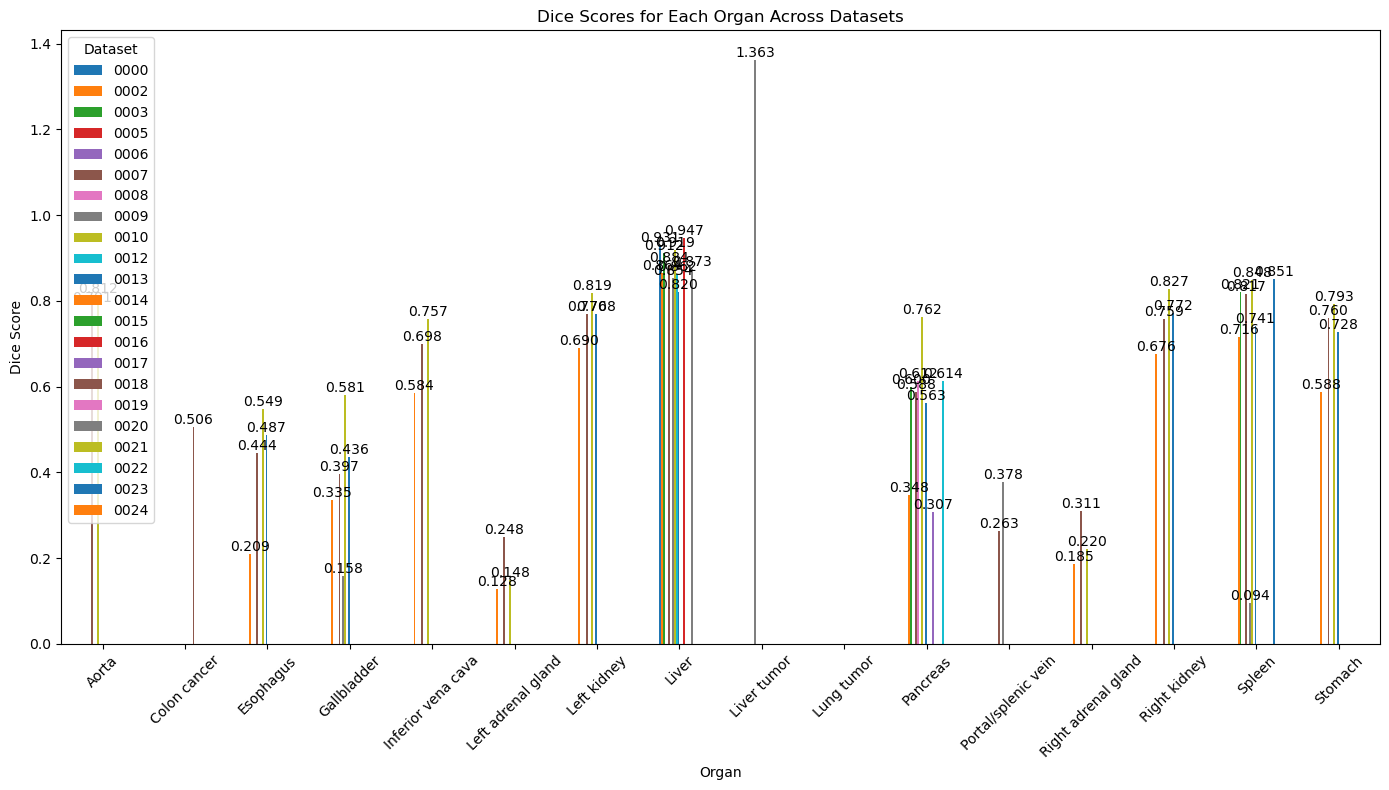

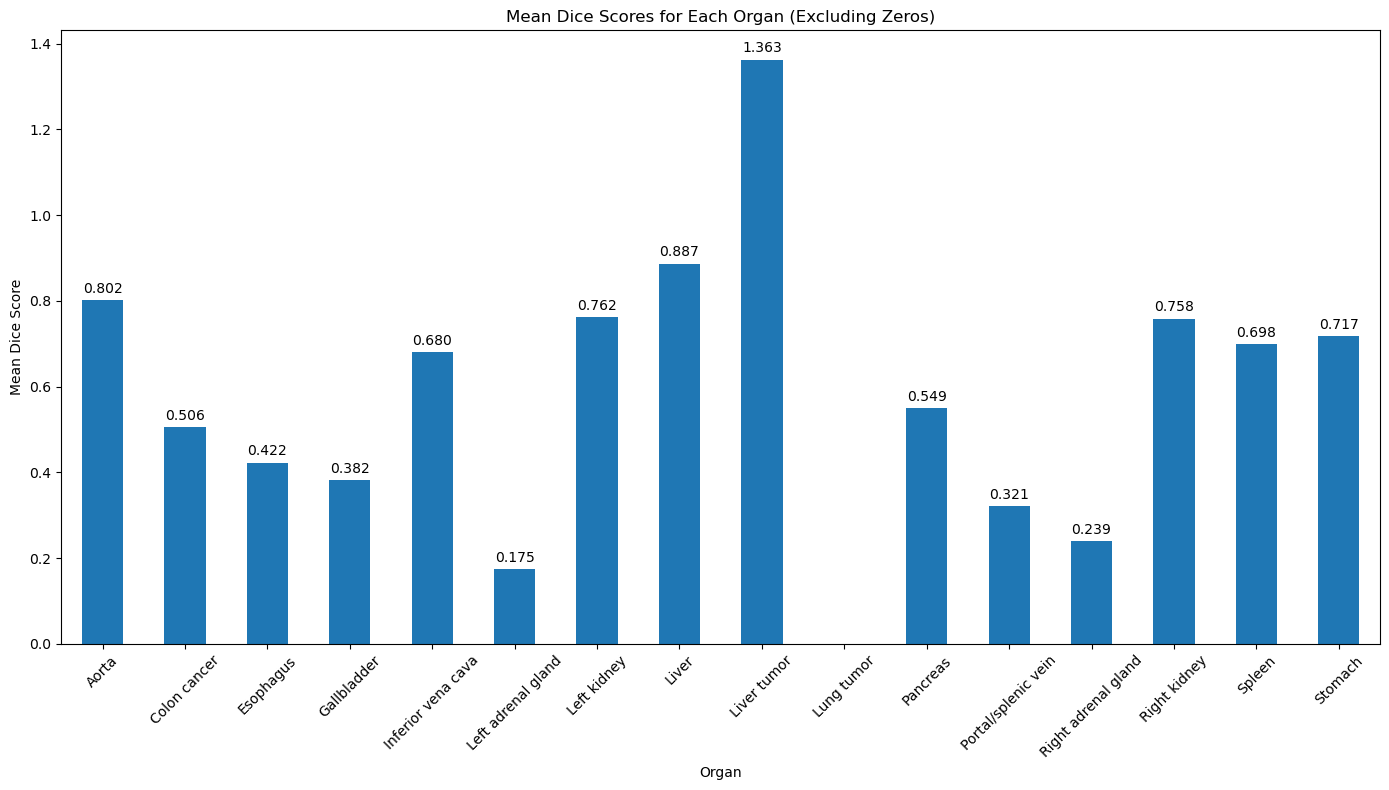

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the column names expected in the CSV file
columns = [
    'Organ', '0000', '0002', '0003', '0005', '0006', '0007', '0008', '0009', '0010',
    '0012', '0013', '0014', '0015', '0016', '0017', '0018', '0019', '0020', '0021',
    '0022', '0023', '0024'
]

# Read the data from the CSV file, specifying the column names and skipping initial spaces
df = pd.read_csv('merged_file.csv', names=columns, skiprows=1, skipinitialspace=True)

# Drop any columns that are completely empty
df.dropna(axis=1, how='all', inplace=True)

# Set the 'Organ' column as the index
df.set_index('Organ', inplace=True)

# Plotting the bar chart for individual datasets
ax = df.plot(kind='bar', figsize=(14, 8))

# Annotating the bars with percentages, but skip zeros
for container in ax.containers:
    labels = [f'{v:.3f}' if v != 0 else '' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge')

plt.xlabel('Organ')
plt.ylabel('Dice Score')
plt.title("Dice Scores for Each Organ Across Datasets")
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()
plt.savefig('dice_scores_for_each_organ_across_datasets.png')

# Calculate the mean Dice scores for each organ, excluding zero values
mean_scores = df.replace(0, pd.NA).mean(axis=1)

# Plotting the mean Dice scores for each organ
plt.figure(figsize=(14, 8))
mean_scores.plot(kind='bar')

# Annotate the bars with the mean values
for i, v in enumerate(mean_scores):
    if not pd.isna(v):
        plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.xlabel('Organ')
plt.ylabel('Mean Dice Score')
plt.title("Mean Dice Scores for Each Organ (Excluding Zeros)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('mean_dice_scores_for_each_organ.png')

In [24]:
import pandas as pd

# Read the first CSV file with the index column set as 'Organ'
file_1 = pd.read_csv('file_1.csv', index_col=0)

# Save the original structure of file_1
file_1_columns = file_1.columns

# Read the second CSV file with the index column set as 'Organ'
file_2 = pd.read_csv('file_2.csv', index_col=0)

# Merge file_2 into file_1
merged_file = file_1.copy()

# Replace the columns in file_1 with those from file_2
for col in file_2.columns:
    if col in file_1.columns:
        merged_file[col] = file_2[col]

# Ensure the columns are in the same order as in file_1's original structure
merged_file = merged_file[file_1_columns]

# Write the merged DataFrame to a new CSV file without the extra index column
merged_file.to_csv('merged_file.csv')

print("Merged file has been saved as 'merged_file.csv'")

Merged file has been saved as 'merged_file.csv'
